In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from models.surface_trap import SurfaceTrap
from models.surface_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout, plot_potential

from pytrans.ions import Ca40

from pathlib import Path

_dir = Path('.').resolve() / 'data'

waveform = np.load(_dir / 'waveform_transport.npy')


In [3]:
from pytrans.analysis.simulate1d import simulate_waveform_1d
from pytrans.analysis.simulate import simulate_waveform

In [4]:
trap = SurfaceTrap()

In [5]:
import json

with open(_dir / 'analysis_transport.json', 'r') as fp:
    rj = json.load(fp)[0]


In [6]:
x_eq = np.asarray(rj['mode_solver_results']['x_eq'])
x1 = x_eq[:, 0]

In [7]:
t = np.linspace(0, 25e-6, 400)
# t = np.linspace(0, 300e-6, 2000)
wf = waveform
trap.ion = Ca40

# t = np.linspace(0, 5e-6, 100)
# wf = [waveform[0]]
x0 = x1
# x2 = trap.x_ele(2)
# x0 = [x2 - 2e-6, x2 + 2e-6]
sim = simulate_waveform_1d(trap, wf, t, x0, slowdown=1)

2
Exec simulate_waveform_1d


  0%|          | 0/1000 [00:00<?, ?%/s]

100%|██████████| 1000/1000 [00:14<00:00, 68.62%/s]


- simulate_waveform_1d elapsed time: 14589.269 ms


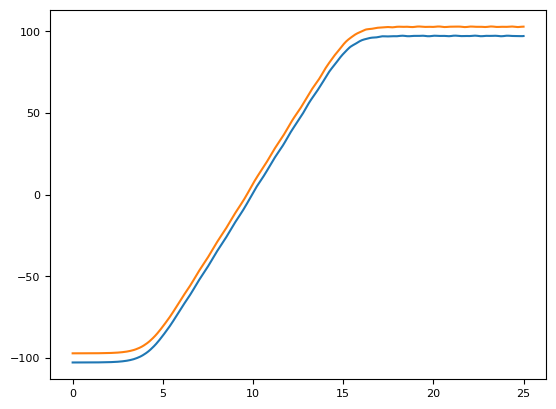

In [8]:
plt.plot(sim.t * 1e6, sim.y[:len(x0)].T *1e6)

In [10]:
ions = [Ca40, Ca40]

# x2 = trap.x_ele(2)
# x2 = [x2 - 2e-6, x2 + 2e-6]
x0 = x_eq.copy()
# x0[:, 0] = [x2 - 2e-6, x2 + 2e-6]

bounds = [(-200e-6, -50e-6), (-10e-6, 10e-6), (trap.z0 - 10e-6, trap.z0 + 10e-6)]

sim3d = simulate_waveform(trap, wf, ions, t, dt=trap.dt, x0=x0, bounds=bounds)


Exec simulate_waveform


 27%|██▋       | 27/100 [00:28<01:17,  1.06s/%]


- simulate_waveform elapsed time: 28540.319 ms
A termination event occurred.


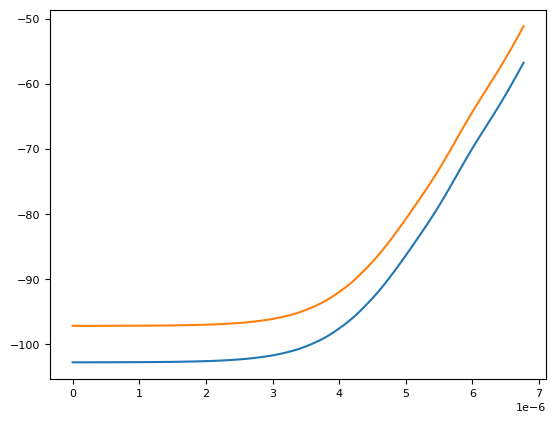

In [11]:
plt.plot(sim3d.t, sim3d.x[:, :, 0] * 1e6)
# plt.plot(sim.t, sim.y[:len(x0)].T *1e6)


In [12]:
sim3d.message


'A termination event occurred.'

In [13]:
sim3d.y_events

[array([[-5.56059548e+01,  1.98241680e-03,  6.70835017e+01,
         -5.00000000e+01, -2.29793075e-03,  6.70784859e+01,
          7.39070636e+02, -2.28049862e-01, -1.81241939e-01,
          7.39438360e+02,  1.03649688e+00,  3.83609977e-02]])]

In [14]:
sim3d.y.shape

(12, 109)

In [15]:
y = sim3d.y[:, 0]
y.shape

N, d = 2, 3
x = y[:N * d]

In [16]:
bounds = [(-200e-6, 0), (-10e-6, 10e-6), (trap.z0 - 10e-6, trap.z0 + 10e-6)]

In [17]:
_x0 = 1e-6
b0 = np.tile([b[0] / _x0 for b in bounds], N)
b1 = np.tile([b[1] / _x0 for b in bounds], N)

def term(x):
    return 1 if np.all(np.bitwise_and(x >= b0, x <= b1)) else -1
